In [1]:
#SHAP for Linear Data
import shap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

df=pd.read_csv("Wine.csv",delimiter=';')
df.head()

X = df.drop(columns=["quality"])
y = df["quality"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)

# Initialize SHAP LinearExplainer
explainer = shap.LinearExplainer(model, X_train)  # Fixed error

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Convert SHAP values into DataFrame
shap_df = pd.DataFrame(shap_values, columns=X.columns)

# Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


FileNotFoundError: [Errno 2] No such file or directory: 'Wine.csv'

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8301 - loss: 0.6118 - val_accuracy: 0.9446 - val_loss: 0.2005
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9478 - loss: 0.1844 - val_accuracy: 0.9581 - val_loss: 0.1438
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9640 - loss: 0.1276 - val_accuracy: 0.9655 - val_loss: 0.1146


<Figure size 800x400 with 0 Axes>

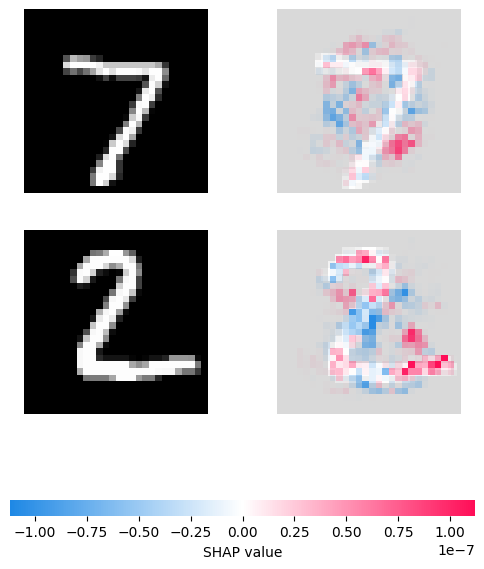

In [6]:
#SHAP for Deep Neural Network Data
import shap
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load a sample dataset (for demonstration, using MNIST)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a simple neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (using fewer epochs for quick results)
model.fit(x_train, y_train, epochs=3, batch_size=128, validation_data=(x_test, y_test))

#Select background data for SHAP explanations
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

#Initialize SHAP DeepExplainer
explainer = shap.DeepExplainer(model, background)

# Select a few test samples
X_test_sample = x_test[:2]

#Compute SHAP values
shap_values = explainer.shap_values(X_test_sample)
index = 1 # Change this to visualize different images

plt.figure(figsize=(8, 4))
shap.image_plot(shap_values, X_test_sample)
